## Загрузим нужные библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import f1_score
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

import imblearn

import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

def fit_plot_confusion(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train )

    mean, std = clf.cv_results_['mean_test_score'][clf.best_index_], \
                clf.cv_results_['std_test_score'][clf.best_index_]

    logging.info(clf.best_params_)

    disp = metrics.plot_confusion_matrix(clf, X_test, y_test , normalize='true')
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()
    
    return clf.best_estimator_, {"mean": mean, "std": std}



from sklearn.model_selection import RandomizedSearchCV


%matplotlib inline

from datetime import date

def calculate_age(born):
    f = "%Y-%m-%d 00:00:00.000"
    born = datetime.strptime(born, f)
    today = date.today()
    return today.year - born.year - ((today.month, 5) < (born.month, born.day))

def calculate_monBr(born):
    f = "%Y-%m-%d 00:00:00.000"
    born = datetime.strptime(born, f)
    return born.month


In [2]:
df = pd.read_csv("data/train_dataset_train.csv")



def replaceInRow(df_m, ColName, search, replace):
    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find(search) == -1 else  replace, axis=1)

def replaceInRowSimple(df_m, ColName, search, replace):
    df_m[ColName] = df_m.apply(lambda row: str(row[ColName]).replace(search, replace) , axis=1)
    
def topoFixCountry(df_m, ColName):    
    replaceInRow(df_m, ColName, 'РОССИЯ', 'Россия')
    replaceInRow(df_m, ColName, 'Казах', 'Казахстан')
    replaceInRow(df_m, ColName, 'аджи', 'Таджикистан')
    replaceInRow(df_m, ColName, 'ырг', 'Киргизия')
    replaceInRow(df_m, ColName, 'Росссия', 'Россия')
    
def topoFix(df_m, ColName):
    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("Китай") == -1 else  "Китай", axis=1)
    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("КНР") == -1 else  "Китай", axis=1)

    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("арнаул") == -1 else  "Барнаул", axis=1)
    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("убцовск") == -1 else  "Рубцовск", axis=1)
    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("овоалтайск") == -1 else  "Барнаул", axis=1)
    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("Бийск") == -1 else  "Бийск", axis=1)
    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("Славгород") == -1 else  "Славгород", axis=1)
    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("Заринск") == -1 else  "Заринск", axis=1)
    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("Камень") == -1 else  "Камень-на-Оби", axis=1)
    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("орно-") == -1 else  "Горно-Алтайск", axis=1)
    

    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("с.") == -1 else  "Село", axis=1)

    df_m[ColName] = df_m.apply(lambda row: "АлтСело" if row[ColName] == 'Село'and row['Регион_ПП'] == 'Алтайский край' else row[ColName],  axis=1)
    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("г.") == -1 else  "Город", axis=1)

    df_m[ColName] = df_m.apply(lambda row: "АлтГород" if row[ColName] == 'Город'and row['Регион_ПП'] == 'Алтайский край' else row[ColName],  axis=1)

    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("р-н") == -1 else  "СелоРайон", axis=1)
    df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("район") == -1 else  "СелоРайон", axis=1)

    df_m[ColName] = df_m.apply(lambda row: "АлтСелоРайон" if row[ColName] == 'СелоРайон'and row['Регион_ПП'] == 'Алтайский край' else row[ColName],  axis=1)
    
    
###
    if True:

        
        
        df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find(" с") == -1 else  "Село", axis=1)

        df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find("с ") == -1 else  "Село", axis=1)
        
     

        df_m[ColName] = df_m.apply(lambda row: row[ColName] if str(row[ColName]).find(" г") == -1 else  "Город", axis=1)



def fixValues(df_m):
    
    
    
    #agu_name = 'ФГБОУ ВО Алтайский государственный университет'
    #polith_name = 'ФГБОУ ВО Алтайский государственный технический университет им. И.И. Ползунова'
    agu_name = 'АГУ'
    polith_name = 'АГТУ'
    
    
    df_m['Уч_Заведение'].fillna('', inplace=True)
    replaceInRow(df_m, 'Уч_Заведение', 'ФГБОУ ВПО Алтайский государственный университет', agu_name)
    replaceInRow(df_m, 'Уч_Заведение', 'Ползу', polith_name)
    replaceInRowSimple(df_m, 'Уч_Заведение', 'Горно-Алтайский', 'Г-А')
    replaceInRow(df_m, 'Уч_Заведение', 'Алтайский государственный университет', agu_name)
    
    replaceInRow(df_m, 'Уч_Заведение', 'СОШ', 'СОШ')
    replaceInRow(df_m, 'Уч_Заведение', 'Гимназия', 'Гимназия')
    replaceInRow(df_m, 'Уч_Заведение', 'ицей', 'Лицей')
    
    replaceInRow(df_m, 'Уч_Заведение', 'средняя общеобразовательная школа', 'СОШ')
    replaceInRow(df_m, 'Уч_Заведение', 'средняя школа', 'СОШ')
    
    #replaceInRow(df_m, 'Уч_Заведение', 'Г-А', 'ВУЗГА')
    
    if False:    
        replaceInRow(df_m, 'Уч_Заведение', 'Алтайский государственный технический университет', polith_name)
        replaceInRow(df_m, 'Уч_Заведение', 'Средняя общеобразовательная школа', 'СОШ')
        replaceInRow(df_m, 'Уч_Заведение', 'Г-А государственный университет', 'Г-А-ГУ')
        replaceInRow(df_m, 'Уч_Заведение', 'Алтайский промышленно-экономический колледж', 'Алтайский_промышленно-экономический_колледж')
        replaceInRow(df_m, 'Уч_Заведение', 'Алтайская академия экономики и права', 'Алтайская_академия_экономики_и_права')
        replaceInRow(df_m, 'Уч_Заведение', 'Алтайский государственный педагогический университет', 'Алтайский_государственный_педагогический_университет')
        replaceInRow(df_m, 'Уч_Заведение', 'Барнаульский государственный педагогический университет', 'Алтайский_государственный_педагогический_университет')
        replaceInRow(df_m, 'Уч_Заведение', 'Барнаульский государственный педагогический колледж', 
                     'Барнаульский_государственный_педагогический_колледж')
        replaceInRow(df_m, 'Уч_Заведение', 'Алтайский государственный аграрный университет', 
                     'Алтайский_государственный_аграрный_университет')
        replaceInRow(df_m, 'Уч_Заведение', 'Алтайская академия гостеприимства', 
                     'Алтайская_академия_гостеприимства')
        replaceInRow(df_m, 'Уч_Заведение', 'Российская академия народного хозяйства', 
                     'Российская_академия_народного хозяйства')    
        replaceInRow(df_m, 'Уч_Заведение', 'Алтайская государственная педагогическая академия', 
                     'Алтайская_государственная_педагогическая_академия')   

        replaceInRow(df_m, 'Уч_Заведение', 'Бийский государственный колледж', 
                     'Бийский_государственный_колледж')   

        replaceInRow(df_m, 'Уч_Заведение', 'Алтайский государственный медицинский университет', 
                     'а_г_Мед_у')   
        replaceInRow(df_m, 'Уч_Заведение', 'крайпотребсоюза', 
                     'техникум_крайпотребсоюза')   
        replaceInRow(df_m, 'Уч_Заведение', 'Восточно-Казахстанский государственный университет', 
                     'Восточно-Казахстанский государственный университет')

        replaceInRow(df_m, 'Уч_Заведение', 'Барнаульский торгово-экономический колледж', 
                     'Барнаульский торгово-экономический колледж')    
    

    
    topoFixCountry(df_m, 'Страна_ПП')
    topoFixCountry(df_m, 'Страна_Родители')


    
    

    df_m['Город_ПП'].fillna('', inplace=True)
    df_m['Регион_ПП'].fillna('', inplace=True)
    df_m['Иностранец'].fillna(0.0, inplace=True)
    replaceInRowSimple(df_m, 'Регион_ПП', 'область', 'обл')
    replaceInRowSimple(df_m, 'Регион_ПП', 'обл.', 'обл')


    replaceInRow(df_m, 'Регион_ПП', 'Алтайский ', 'Алтайский край')
    replaceInRow(df_m, 'Регион_ПП', 'Алайский край', 'Алтайский край')
    
    
    
    #replaceInRow(df_m, 'Регион_ПП', 'Алтай респ', 'Республика Алтай')
    
    
    

    
    topoFix(df_m, 'Город_ПП')
    topoFix(df_m, 'Где_Находится_УЗ')
       
    
    df_m.loc[df['Изучаемый_Язык'] == 'Русский язык', 'Изучаемый_Язык'] = 'Английский язык'
    
    df_m['Изучаемый_Язык'].fillna('', inplace=True)
    
    df_m['Изучаемый_Язык'] = df_m.apply(lambda row: row['Изучаемый_Язык'] if str(row['Изучаемый_Язык']).find("Англ") == -1 else  "Английский язык", axis=1)
    df_m['Изучаемый_Язык'] = df_m.apply(lambda row: row['Изучаемый_Язык'] if str(row['Изучаемый_Язык']).find("Нем") == -1 else  "Немецкий язык", axis=1)
    
    return df_m
    
   

In [3]:
df = fixValues(df)


In [4]:
gl_map = {}
#df = pd.read_csv("train_dataset_train.csv")

col_name ='Страна_Родители' 

gl_map[col_name] = df[col_name].unique().tolist()

col_name ='Изучаемый_Язык' 

gl_map[col_name] = df[col_name].unique().tolist()

col_name ='Страна_ПП' 

gl_map[col_name] = df[col_name].unique().tolist()

col_name ='Где_Находится_УЗ' 

gl_map[col_name] = df[col_name].unique().tolist()

col_name ='Город_ПП' 

gl_map[col_name] = df[col_name].unique().tolist()

col_name ='Уч_Заведение' 

gl_map[col_name] = df[col_name].unique().tolist()




col_name ='Регион_ПП' 

gl_map[col_name] = df[col_name].unique().tolist()



#vus_map.index('муж')

def getVusIndex(row, colName):
    valueCell = row[colName]
    if valueCell not in gl_map[colName]:
        return -1
    else:
        return gl_map[colName].index(valueCell)
    
def findVO(row):
    valRow = str(row['Уч_Заведение'])
    
    res = valRow.find(" ВО ") > -1 or valRow.find(" ВПО ") > -1 or valRow.find("нститут") > -1 
    return (res)*1
    
def findSH(row):
    valRow = str(row['Уч_Заведение'])
    
    res = valRow.find("СОШ") > -1 or valRow.find("кола") > -1 
    return (res)*1

def findSH_VIP(row):
    valRow = str(row['Уч_Заведение'])
    
    res = valRow.find("имназия") > -1 or valRow.find("лицей") > -1 or valRow.find("колледж") > -1 
    return (res)*1
        


In [5]:

def calculate_ageIn(born):
    bd = born['Дата_Рождения']
    
    f = "%Y-%m-%d 00:00:00.000"
    
    inY = born['Год_Поступления']
    if inY < 1900:
        return 17
    today = date.today()
    yearsAgoIN = today.year - inY
    born = datetime.strptime(bd, f)
    
    
    age = today.year - born.year - ((today.month, 5) < (born.month, born.day))
    ageOnIn = age - yearsAgoIN
    if ageOnIn < 8:
        return 18
    return ageOnIn

def calculate_InOld(row):
    today = date.today()
    if row['Год_Окончания_УЗ'] < 10 or  row['Год_Поступления'] < 10:
        return 0
    return today.year - row['Год_Поступления']

def calculate_gap(row):
    
    if row['Год_Окончания_УЗ'] < 10 or  row['Год_Поступления'] < 10:
        return 0
    return row['Год_Поступления'] - row['Год_Окончания_УЗ']

def form_mark(val):
    if val > 100:
        val = val /1000
    #val = row['СрБаллАттестата']
    if val < 5:
        return (val/5)*80/100
    return val/100

def form_mark_2(val):
    if val > 1000:
        val = val /1000
    #val = row['СрБаллАттестата']
    if val < 7:
        return (val/5)*80/100
    return val/100
print(form_mark(2))

print(form_mark(2))

0.32
0.32


In [6]:
#df = pd.read_csv("train_dataset_train.csv")

In [7]:
df['wom_int'] = df.apply(lambda row: (row['Пол'] == 'Жен')*1.0, axis=1)
gp = df.groupby(['Код_группы']).agg({'wom_int': ['mean']}).reset_index()
m_map = {}
for index, row in gp.iterrows():
    m_map[int(row['Код_группы'])] = float(row['wom_int'])


#print(m_map)
df['ball4'] = df.apply(lambda row: form_mark_2(row['СрБаллАттестата']), axis=1)
gp = df.groupby(['КодФакультета']).agg({'ball4': ['mean']}).reset_index()
b_map = {}
for index, row in gp.iterrows():
    b_map[int(row['КодФакультета'])] = float(row['ball4'])
    

#--------------------------------
gp = df.groupby(['КодФакультета']).agg({'wom_int': ['mean']}).reset_index()
kaf_pol_map = {}
for index, row in gp.iterrows():
    kaf_pol_map[int(row['КодФакультета'])] = float(row['wom_int'])
    






## Рассмотрим датасет по ближе

In [8]:
#df = pd.read_csv("train_dataset_train.csv")

def fillFields(df_i):
    #df_i['man_int'] = df_i.apply(lambda row: (row['Пол'] == 'Муж')*1, axis=1)
    df_i['wom_int'] = df_i.apply(lambda row: (row['Пол'] == 'Жен')*1, axis=1)
    df_i['lang_int'] = df_i.apply(lambda row: getVusIndex(row,'Изучаемый_Язык'), axis=1)
    df_i['prCt_int'] = df_i.apply(lambda row: getVusIndex(row,'Страна_Родители'), axis=1)

    df_i['ctPP_int'] = df_i.apply(lambda row: getVusIndex(row,'Страна_ПП'), axis=1)
    df_i['US_location_in'] = df_i.apply(lambda row: getVusIndex(row,'Где_Находится_УЗ'), axis=1)

    df_i['reg_pp_in'] = df_i.apply(lambda row: getVusIndex(row,'Регион_ПП'), axis=1)
    df_i['gorod_pp_in'] = df_i.apply(lambda row: getVusIndex(row,'Город_ПП'), axis=1)
    df_i['uch_zav_indx'] = df_i.apply(lambda row: getVusIndex(row,'Уч_Заведение'), axis=1)
    

    df_i['oldIn'] = df_i.apply(lambda row: calculate_InOld(row), axis=1)
    df_i['m_pol'] = df_i.apply(lambda row: 0.5 if int(row['Код_группы']) not in m_map else  m_map[int(row['Код_группы'])], axis=1)

    #df_i['KG_even'] = df_i.apply(lambda row: row['Код_группы']%2 , axis=1)
    #df_i['KG_big'] = df_i.apply(lambda row: (row['Код_группы']<14000)*1 , axis=1)


    #df_i['monBr'] = df_i.apply(lambda row: calculate_monBr(row['Дата_Рождения']), axis=1)

    #df_i['isUniver'] = df_i.apply(lambda row: (str(row['Уч_Заведение']).find("универ") > -1)*1, axis=1)
    #df_i['isVO'] = df_i.apply(lambda row: findVO(row), axis=1)
    #df_i['isMBOU'] = df_i.apply(lambda row: (str(row['Уч_Заведение']).find("МБОУ") > -1)*1, axis=1)
    #df_i['isSH'] = df_i.apply(lambda row: findSH(row), axis=1)
    #df_i['isSH_VIP'] = df_i.apply(lambda row: findSH_VIP(row), axis=1)

    #df_i['US_len'] = df_i.apply(lambda row: len(str(row['Уч_Заведение'])), axis=1)




    df_i['gap'] = df_i.apply(lambda row: calculate_gap(row), axis=1)

    df_i['os_oo'] = df_i.apply(lambda row: (row['Основания'] == 'ОО')*1, axis=1)
    df_i['os_cn'] = df_i.apply(lambda row: (row['Основания'] == 'ЦН')*1, axis=1)
    df_i['os_dn'] = df_i.apply(lambda row: (row['Основания'] == 'ДН')*1, axis=1)
    df_i['os_bn'] = df_i.apply(lambda row: (row['Основания'] == 'БН')*1, axis=1)
    df_i['os_sn'] = df_i.apply(lambda row: (row['Основания'] == 'СН')*1, axis=1)
    df_i['age'] = df_i.apply(lambda row: calculate_age(row['Дата_Рождения']), axis=1)
    df_i['ageIn'] = df_i.apply(lambda row: calculate_ageIn(row), axis=1)
    #df_i['seloTo'] = df_i.apply(lambda row: (str(row['Город_ПП']).find('Барнаул') > -1 or row['Село'] >0 )*1, axis=1)
    #df_i['isRus'] = df_i.apply(lambda row: (row['Страна_ПП'] == 'Россия')*1, axis=1)
    df_i['ball4'] = df_i.apply(lambda row: form_mark_2(row['СрБаллАттестата']), axis=1)
    #df_i['ball4_10'] = df_i.apply(lambda row: (row['СрБаллАттестата'] < 5 and row['СрБаллАттестата'] < 11)*1, axis=1)



    df_i['b_pol'] = df_i.apply(lambda row: b_map[int(row['КодФакультета'])], axis=1)

    df_i['kaf_pol_mean'] = df_i.apply(lambda row: kaf_pol_map[int(row['КодФакультета'])], axis=1)
    

    #print(b_map)

    #df_i['os_sn'] = df_i.apply(lambda row: (row['Основания'] == 'СН')*1, axis=1)

    df_i = df_i.fillna(0)
    return df_i

df =fillFields(df)
#Tmp =  df[["isVO", 'Уч_Заведение', 'ball4', 'm_pol']]
#Tmp.head(30)



Пострим на распределение данных

Text(0.5, 1.0, 'Распределение предсказываемой величены')

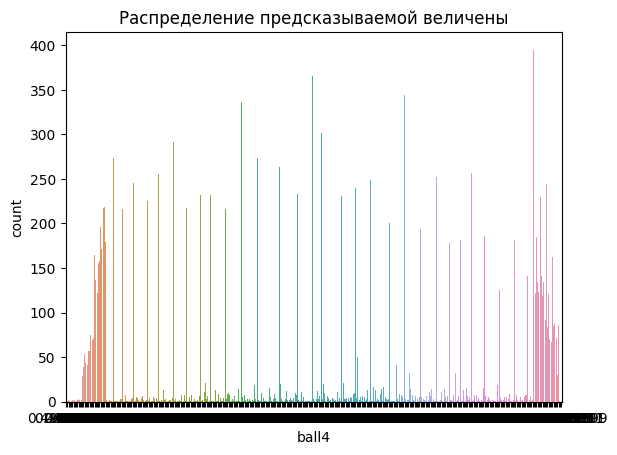

In [9]:
sns.countplot(x = "ball4" , data  = df).set_title('Распределение предсказываемой величены')

Взглянем на несколько величин сразу

Обратим внимание на часть столбцов с постоянными значениями

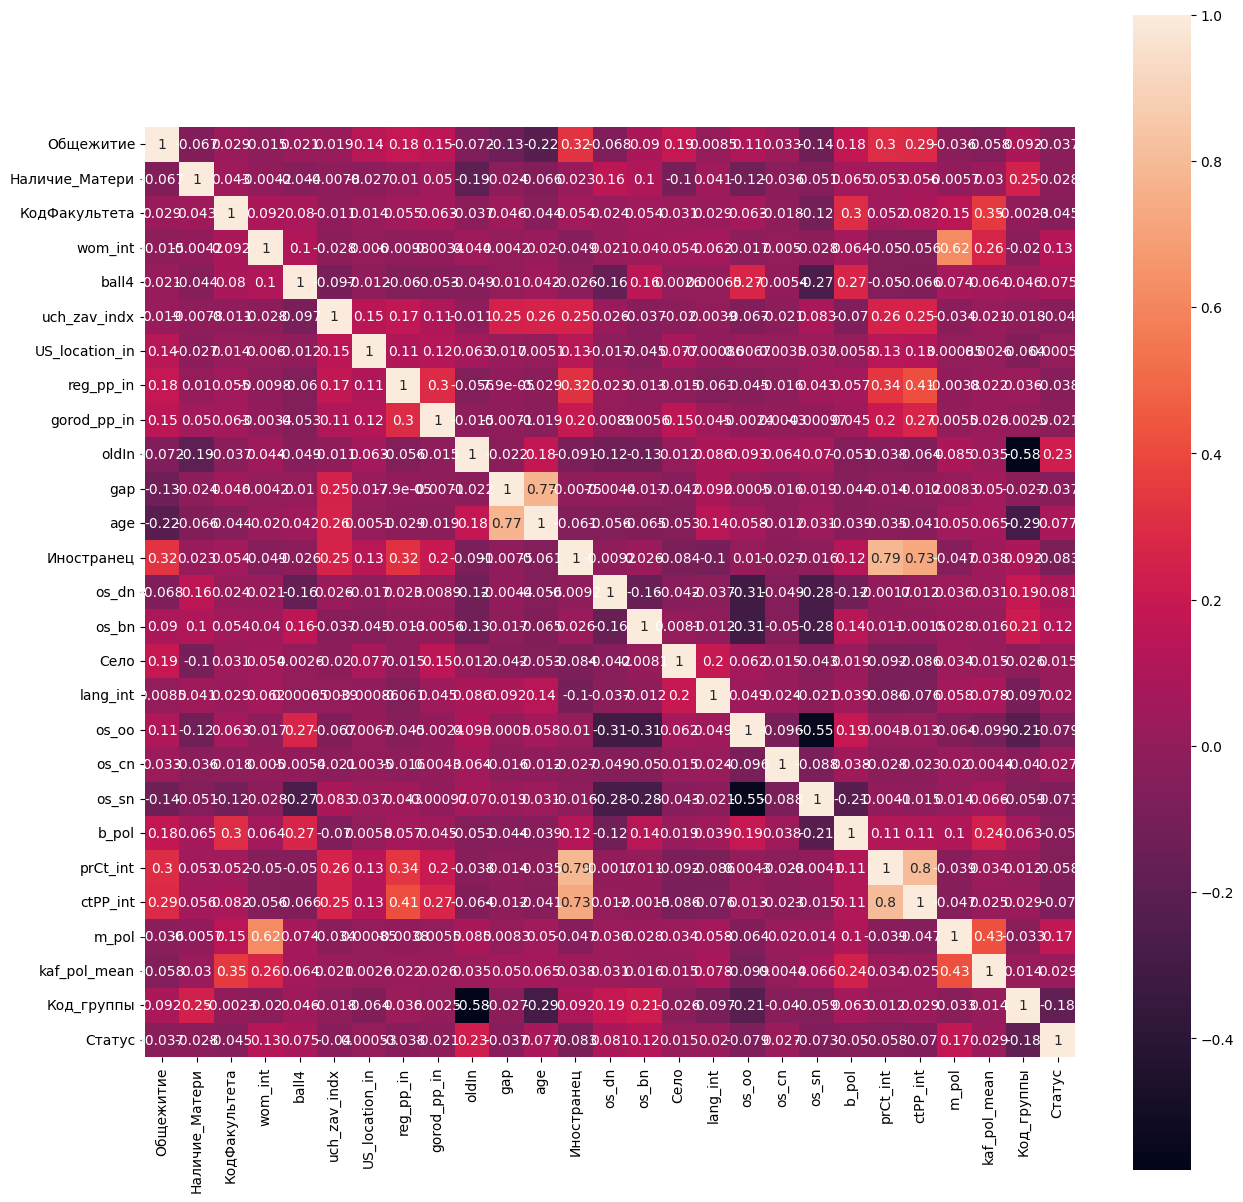

In [10]:

fld_list = [ 'Общежитие', 
            'Наличие_Матери', 
            'КодФакультета', 
            #'Год_Поступления',
            "wom_int",
                'ball4', 
            'uch_zav_indx',
            #'isUniver',
            #'isVO',
            #'isMBOU',
            #'isSH_VIP',
            #'isSH',
            'US_location_in',
            'reg_pp_in',
            'gorod_pp_in',
            'oldIn',
           
            #'СрБаллАттестата',
            #'monBr',
            #'KG_even',
            #'KG_big',
            #'US_len',
            'gap',
            'age',
            'Иностранец', 
            'os_dn', 
            'os_bn', 
            'Село',
            'lang_int', 
            'os_oo',
            'os_cn', 
            'os_sn', 
             'b_pol',
            'prCt_int', 
            'ctPP_int',
            'm_pol',
            
            'kaf_pol_mean',
             'Код_группы',
           ]


fld_list_1 = [ 
            'Код_группы',
    'Год_Поступления',
    'm_pol',
    'ball4', 
                  'Село',       
     'Иностранец',
    'ageIn',
            "wom_int",

                  'os_dn', 
            'os_bn',    
    'b_pol'
           ]

fld_list_diag = fld_list.copy()
fld_list_diag.append('Статус')
plt.rcParams['figure.figsize']=(15,15)


#df_corr = list(set(df.columns.values) - set(['Опекунство','Пособие','Наличие_Матери', 'СрБаллАттестата', 'Год_Окончания_УЗ']))
g = sns.heatmap(df[fld_list_diag].corr(), square = True, annot=True)

## Выделим выборки

Поместим все столбцы object в массив, для их дальнейшего удаления

In [11]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='all', random_state=7) #minority



print(fld_list)

#mass_object = np.append(mass_object, "Год_Поступления")

X = df[fld_list]

#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

y = df[["Статус"]]



print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, y_train = sm.fit_resample(X_train, y_train)


['Общежитие', 'Наличие_Матери', 'КодФакультета', 'wom_int', 'ball4', 'uch_zav_indx', 'US_location_in', 'reg_pp_in', 'gorod_pp_in', 'oldIn', 'gap', 'age', 'Иностранец', 'os_dn', 'os_bn', 'Село', 'lang_int', 'os_oo', 'os_cn', 'os_sn', 'b_pol', 'prCt_int', 'ctPP_int', 'm_pol', 'kaf_pol_mean', 'Код_группы']
(13584, 26)


C:\Users\codin\AppData\Local\Temp\ipykernel_22040\1019281617.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


0.7834130219883552


C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


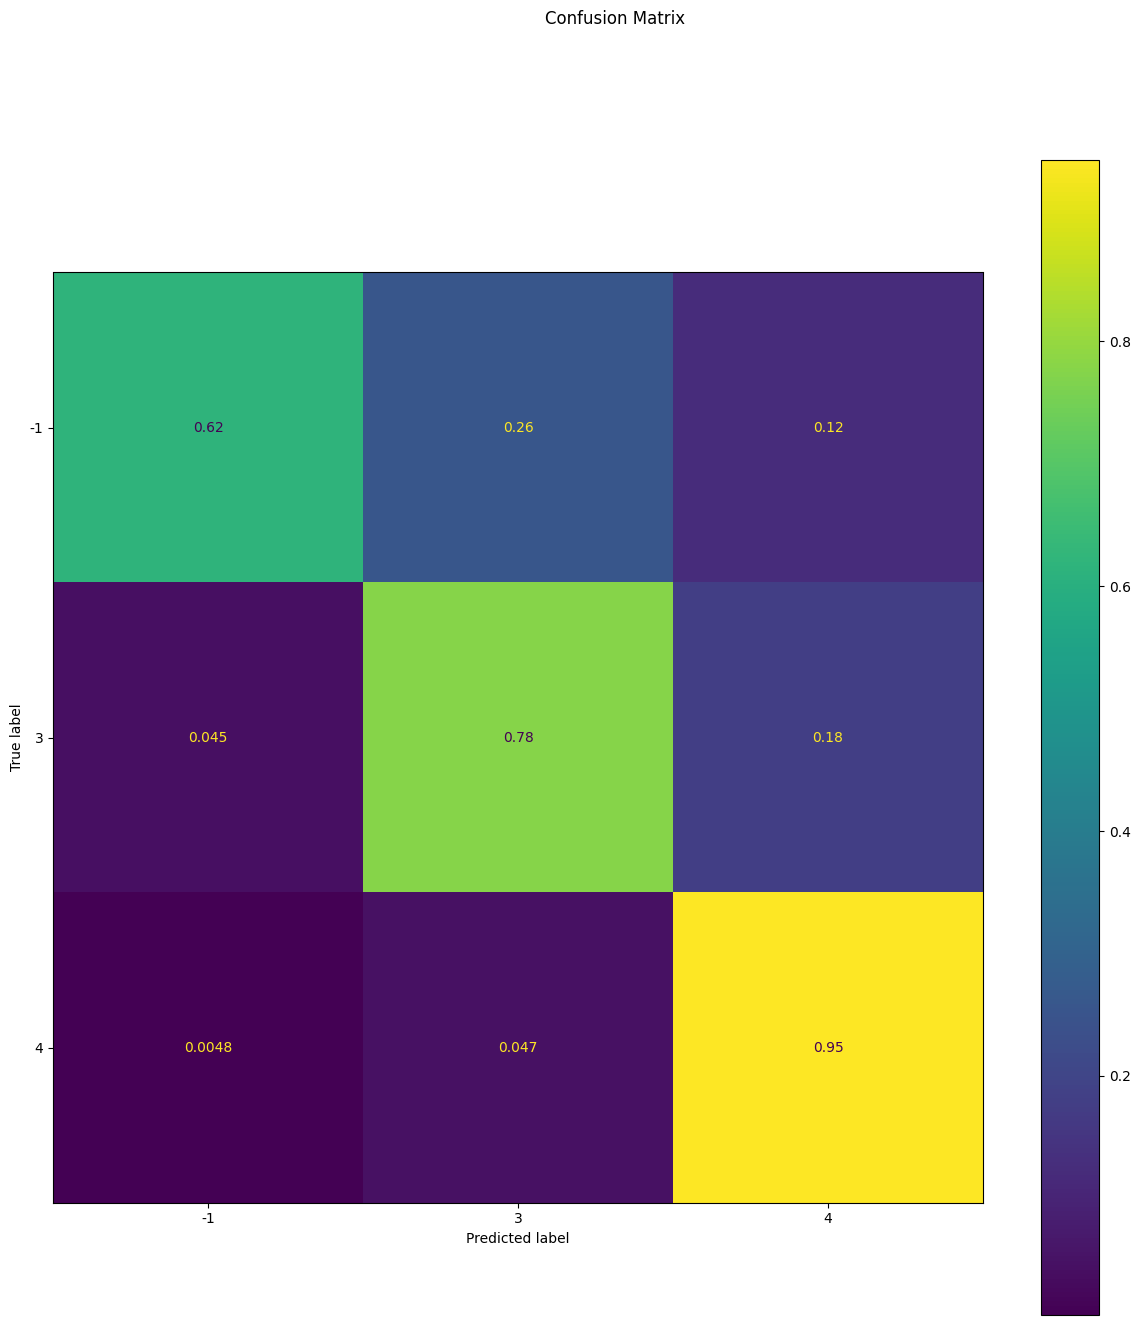

In [12]:
#Обучение модели
#{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 22, 'criterion': 'entropy'}

clf = RandomForestClassifier(n_jobs=10, criterion="entropy",random_state=0, n_estimators=5000, max_depth=21, min_samples_split=2, min_samples_leaf=1 )
#clf = RandomForestClassifier(n_jobs=10, criterion="entropy",random_state=0, n_estimators=150, max_depth=20, min_samples_split=19, min_samples_leaf=2 )

clf.fit(X_train, y_train)
#clf.fit(X_train, y_train)

#from sklearn.ensemble import BaggingClassifier

#bclf = BaggingClassifier(base_estimator=clf,    n_estimators=10, random_state=0)
#bclf.fit(X_train, y_train)
pred = clf.predict(X_test)
#print(pred.shape)
#print(pred)
#Оценка точности
print(f1_score(y_test, pred, average='macro', zero_division = 0))
disp = metrics.plot_confusion_matrix(clf, X_test, y_test , normalize='true')
disp.figure_.suptitle("Confusion Matrix")
plt.show()

# Cоздание файла с ответом

In [13]:
df_test = pd.read_csv("data/test_dataset_test.csv", index_col=False)
df_submission = pd.read_csv("data/submission_baseline.csv", index_col=False)


df_test = fixValues(df_test)

df_test = fillFields(df_test)



df_test = df_test[fld_list]



#scaler = MinMaxScaler()
#df_test = scaler.fit_transform(df_test)
#df_test
#df_test.head(3)
df_test_pred = clf.predict(df_test)
df_submission["Статус"] = df_test_pred
df_submission.head(4)

,ID,Статус
0,64996,4
1,71837,4
2,86587,-1
3,73673,-1


In [14]:
df_submission.to_csv("sub/submission_8_48_5000_def.csv", index=False)#13 для тестирования